In [1]:
!git clone https://github.com/ccjimenezm/Network_science_G9.git

Cloning into 'Network_science_G9'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 46 (delta 22), reused 14 (delta 5), pack-reused 0
Unpacking objects: 100% (46/46), 2.45 MiB | 4.35 MiB/s, done.


In [2]:
%cd Network_science_G9/

/content/Network_science_G9


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite

In [4]:
dataset = open("brunson_club-membership/out.brunson_club-membership_club-membership", "r")

In [5]:
list_obj = [item.split(' ') for item in dataset.readlines()]

In [6]:
type(int(list_obj[2][0]))

int

In [7]:
users = []
clubs = []
edges = []
for x in list_obj:
  if x[0] != '%':
    edges.append((x[0]+'u',x[1]+'c'))
    users.append(int(x[0]))
    clubs.append(int(x[1]))

In [8]:
res = np.array(users) 
users_uni = np.unique(res) 

In [9]:
users_uni = np.sort(users_uni).tolist()

In [10]:
users_uni = [str(i) + 'u' for i in users_uni]

In [ ]:
users_uni

In [11]:
res = np.array(clubs) 
clubs_uni = np.unique(res) 
clubs_uni = np.sort(clubs_uni).tolist()

In [12]:
clubs_uni = [str(i) + 'c' for i in clubs_uni]

In [ ]:
clubs_uni

In [ ]:
edges

In [13]:
B = nx.Graph()

B.add_nodes_from(users_uni, bipartite=0)
B.add_nodes_from(clubs_uni, bipartite=1)

B.add_edges_from(edges)

In [14]:
nx.is_connected(B)

True

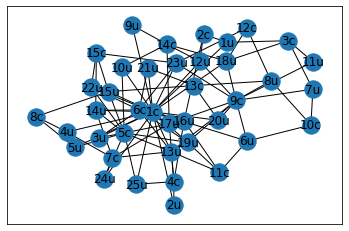

In [15]:
nx.draw_networkx(B)

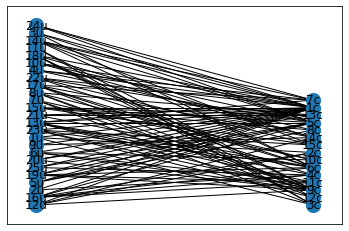

In [16]:
X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(B, pos = pos, node_size=200)
plt.show()

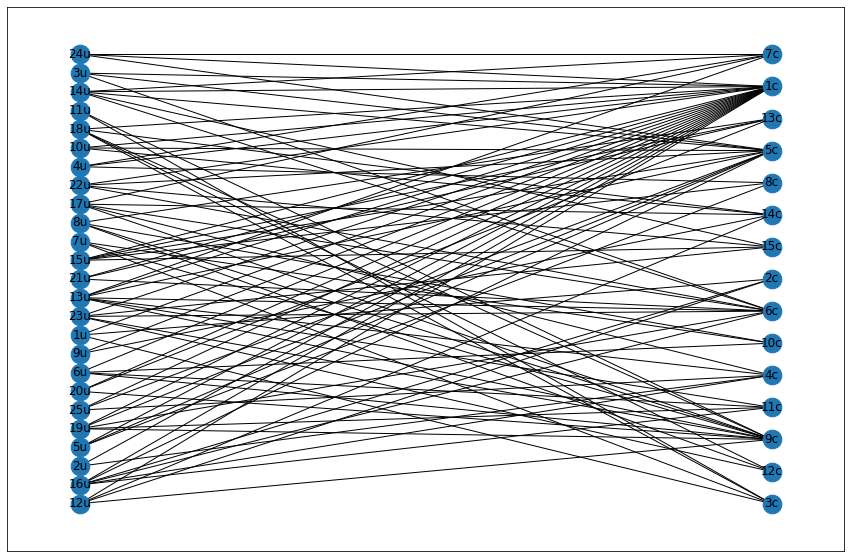

In [17]:

fig, ax = plt.subplots()
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,users_uni ),node_size=350)
fig.set_size_inches(15, 10)
plt.show()

In [18]:
nx.is_bipartite(B)

True

In [19]:
bipartite.centrality.degree_centrality(B, users_uni)

{'12u': 0.26666666666666666,
 '16u': 0.4,
 '2u': 0.13333333333333333,
 '5u': 0.2,
 '19u': 0.3333333333333333,
 '25u': 0.2,
 '20u': 0.2,
 '6u': 0.26666666666666666,
 '9u': 0.13333333333333333,
 '1u': 0.2,
 '23u': 0.3333333333333333,
 '13u': 0.4666666666666667,
 '21u': 0.2,
 '15u': 0.3333333333333333,
 '7u': 0.2,
 '8u': 0.26666666666666666,
 '17u': 0.3333333333333333,
 '22u': 0.26666666666666666,
 '4u': 0.2,
 '10u': 0.2,
 '18u': 0.3333333333333333,
 '11u': 0.13333333333333333,
 '14u': 0.3333333333333333,
 '3u': 0.2,
 '24u': 0.2,
 '3c': 0.16,
 '12c': 0.12,
 '9c': 0.44,
 '11c': 0.16,
 '4c': 0.2,
 '10c': 0.12,
 '6c': 0.36,
 '2c': 0.12,
 '15c': 0.16,
 '14c': 0.2,
 '8c': 0.12,
 '5c': 0.44,
 '13c': 0.16,
 '1c': 0.84,
 '7c': 0.2}

In [20]:
bipartite.clustering(B)

{'1u': 0.20840548340548343,
 '2u': 0.2485260770975057,
 '3u': 0.3697278911564626,
 '4u': 0.2291950113378685,
 '5u': 0.32107142857142856,
 '6u': 0.23392857142857146,
 '7u': 0.26421356421356423,
 '8u': 0.22410714285714284,
 '9u': 0.25719954648526083,
 '10u': 0.32562358276643993,
 '11u': 0.25378787878787873,
 '12u': 0.2485449735449736,
 '13u': 0.3099371693121693,
 '14u': 0.33607331821617537,
 '15u': 0.27363945578231297,
 '16u': 0.30578231292517005,
 '17u': 0.1917044595616024,
 '18u': 0.24184854497354502,
 '19u': 0.3263392857142858,
 '20u': 0.25877976190476193,
 '21u': 0.2615800865800866,
 '22u': 0.347108843537415,
 '23u': 0.25826719576719576,
 '24u': 0.3210884353741497,
 '25u': 0.3241496598639456,
 '1c': 0.1955196149606087,
 '2c': 0.12583250083250083,
 '3c': 0.16032608695652173,
 '4c': 0.202231795981796,
 '5c': 0.21778221778221776,
 '6c': 0.2299760845215391,
 '7c': 0.17579334246000913,
 '8c': 0.1571428571428571,
 '9c': 0.191856604933528,
 '10c': 0.16936758893280632,
 '11c': 0.216815476190

In [21]:
bipartite.closeness_centrality(B, users_uni)

{'12u': 0.7411764705882353,
 '16u': 0.7241379310344828,
 '2u': 0.6631578947368421,
 '5u': 0.6631578947368421,
 '19u': 0.7590361445783133,
 '25u': 0.6774193548387096,
 '20u': 0.7241379310344828,
 '6u': 0.7411764705882353,
 '9u': 0.6631578947368421,
 '1u': 0.6923076923076923,
 '23u': 0.7590361445783133,
 '13u': 0.7974683544303798,
 '21u': 0.6923076923076923,
 '15u': 0.7078651685393258,
 '7u': 0.5478260869565217,
 '8u': 0.5779816513761468,
 '17u': 0.7078651685393258,
 '22u': 0.6923076923076923,
 '4u': 0.6774193548387096,
 '10u': 0.6774193548387096,
 '18u': 0.7590361445783133,
 '11u': 0.5384615384615384,
 '14u': 0.7078651685393258,
 '3u': 0.6774193548387096,
 '24u': 0.6774193548387096,
 '3c': 0.4774774774774775,
 '12c': 0.48623853211009177,
 '9c': 0.6385542168674698,
 '11c': 0.4953271028037383,
 '4c': 0.5047619047619047,
 '10c': 0.4690265486725664,
 '6c': 0.5824175824175825,
 '2c': 0.48623853211009177,
 '15c': 0.4953271028037383,
 '14c': 0.5145631067961165,
 '8c': 0.44537815126050423,
 '5c

In [33]:
print(f"The average_shortest_path_length of \nthe affiliation network is: {nx.average_shortest_path_length(B)}")

The average_shortest_path_length of 
the affiliation network is: 2.4474358974358976
